In [1127]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt 
import statistics
%matplotlib inline 
import warnings 
os.chdir('/Users/smsultanmahmudrahat/Downloads/Data_Mining/project')

In [1128]:
loan_train=pd.read_csv('train_dataset.csv')
loan_train.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### checking NA

In [1129]:
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### drop NA

In [1130]:
loan_train.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1131]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1132]:
corr_train=loan_train.corr()
corr_train

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/4124417778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_train=loan_train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [1133]:
import matplotlib as plt

In [1134]:
import seaborn as sns

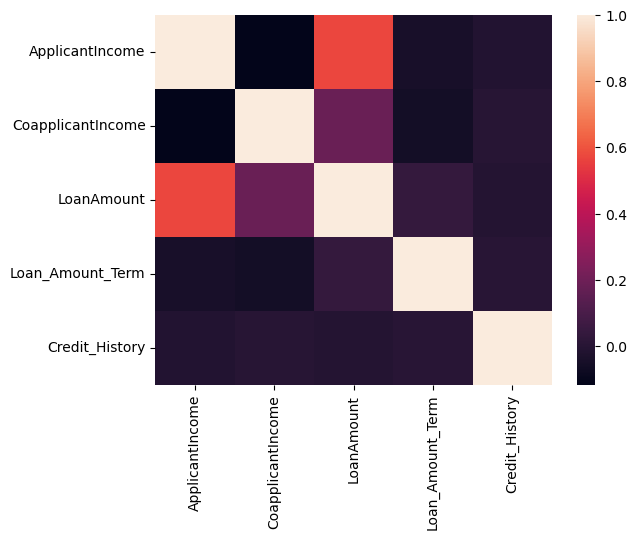

In [1135]:
ax_train= sns.heatmap(corr_train)

In [1136]:
loan_train_drop=loan_train.drop(columns=['Loan_ID','Education', 'Property_Area', 'Gender'])
loan_train_drop

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.0,360.0,1.0,Y
610,Yes,3+,No,4106,0.0,40.0,180.0,1.0,Y
611,Yes,1,No,8072,240.0,253.0,360.0,1.0,Y
612,Yes,2,No,7583,0.0,187.0,360.0,1.0,Y


### dropped NA on the subset

In [1137]:
loan_train_drop.dropna()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,No,6000,0.0,141.0,360.0,1.0,Y
5,Yes,2,Yes,5417,4196.0,267.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.0,360.0,1.0,Y
610,Yes,3+,No,4106,0.0,40.0,180.0,1.0,Y
611,Yes,1,No,8072,240.0,253.0,360.0,1.0,Y
612,Yes,2,No,7583,0.0,187.0,360.0,1.0,Y


In [1138]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1139]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [1140]:
loan_train_drop

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y
1,Yes,1,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,0,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...
609,No,0,No,2900,0.0,71.0,360.0,1.0,Y
610,Yes,3+,No,4106,0.0,40.0,180.0,1.0,Y
611,Yes,1,No,8072,240.0,253.0,360.0,1.0,Y
612,Yes,2,No,7583,0.0,187.0,360.0,1.0,Y


In [1141]:
loan_train_drop['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: title={'center': 'Loan Status'}>

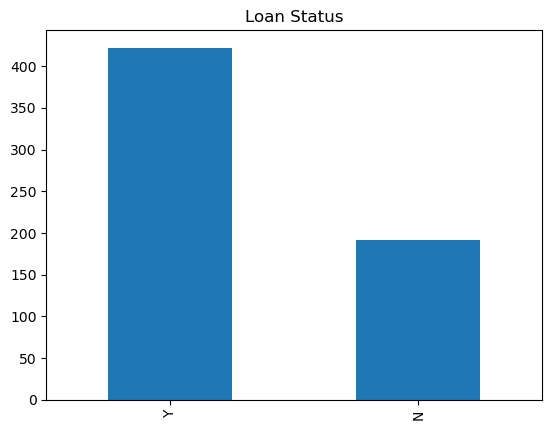

In [1142]:
loan_train_drop['Loan_Status'].value_counts().plot.bar(title="Loan Status")

In [1143]:
loan_train_drop["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<Axes: title={'center': 'Married'}>

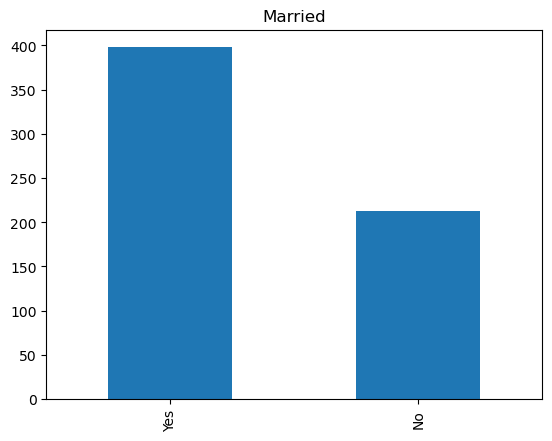

In [1144]:
loan_train_drop["Married"].value_counts().plot.bar(title='Married')

In [1145]:
loan_train_drop['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: title={'center': 'Credit History'}>

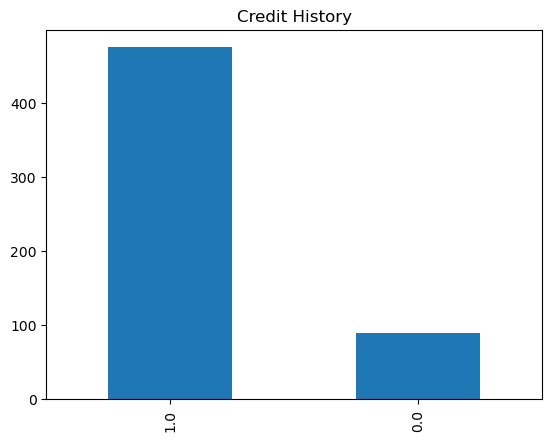

In [1146]:
loan_train_drop['Credit_History'].value_counts().plot.bar(title='Credit History')

In [1147]:
loan_train_drop['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<Axes: title={'center': 'Self Employed'}>

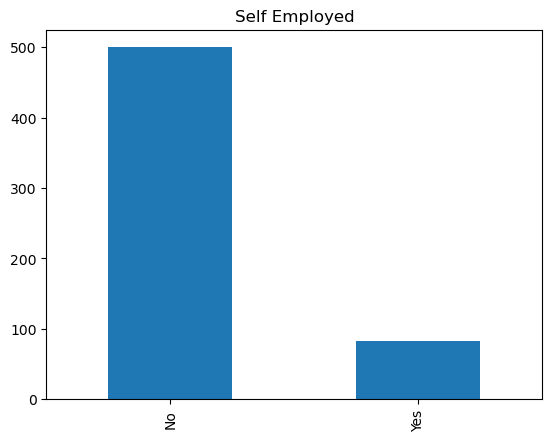

In [1148]:
loan_train_drop['Self_Employed'].value_counts().plot.bar(title='Self Employed')

<Axes: >

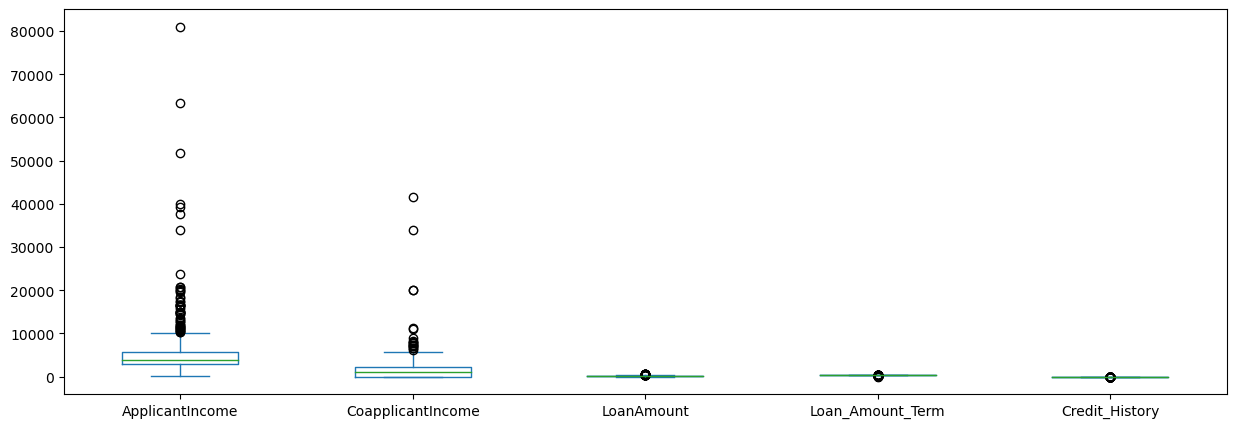

In [1149]:
loan_train_drop.plot.box(figsize=(15,5))

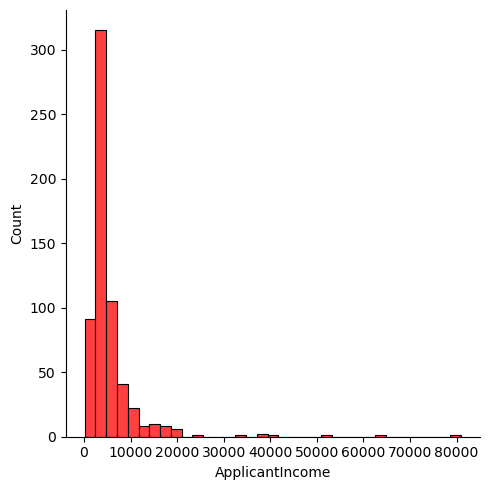

In [1150]:
sns.displot(loan_train_drop['ApplicantIncome'], kde = False, color ='red', bins = 35)

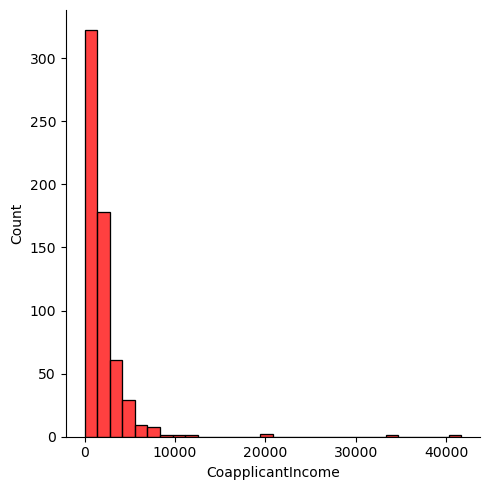

In [1151]:
sns.displot(loan_train_drop['CoapplicantIncome'], kde = False, color ='red', bins = 30)

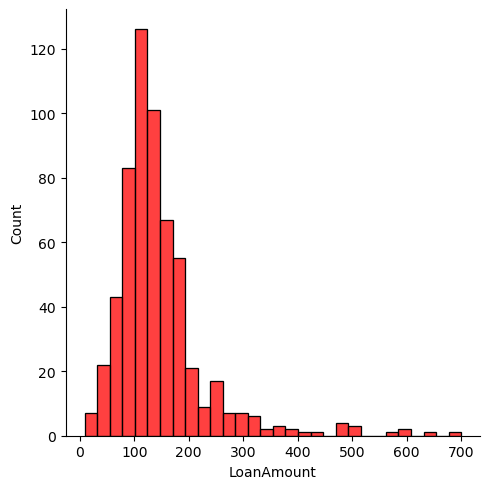

In [1152]:
sns.displot(loan_train_drop['LoanAmount'], kde = False, color ='red', bins = 30)

<Axes: >

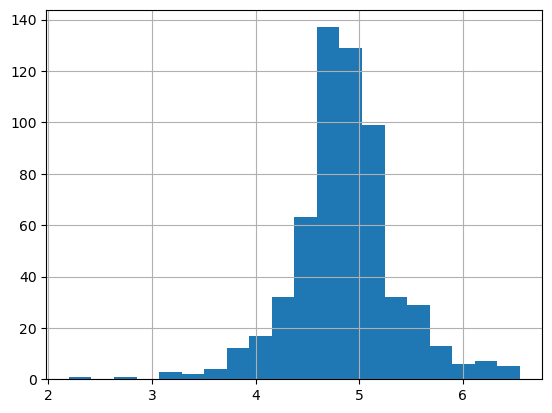

In [1153]:
# to make it into a normalization, we will apply log distribution 
loan_train_drop ["LoanAmount"]= np.log(loan_train_drop["LoanAmount"])
loan_train_drop ["LoanAmount"].hist(bins=20)

<Axes: title={'center': 'LoanAmount'}, xlabel='Credit_History'>

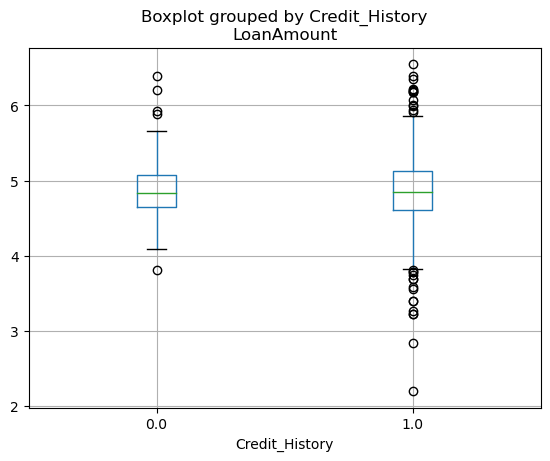

In [1154]:
loan_train_drop.boxplot(column="LoanAmount", by="Credit_History")

<Axes: xlabel='Credit_History'>

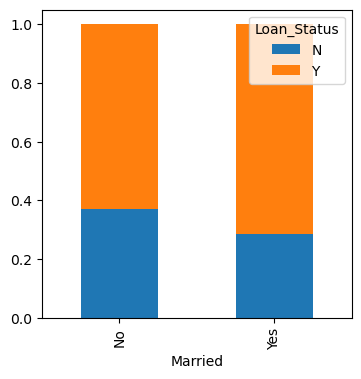

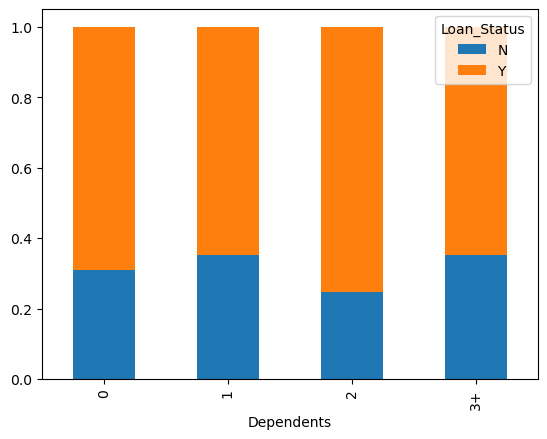

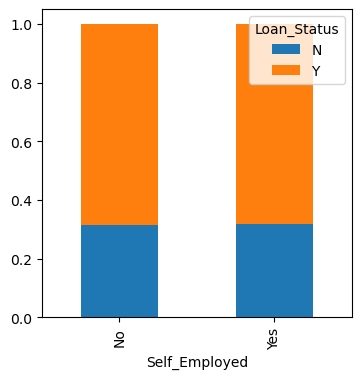

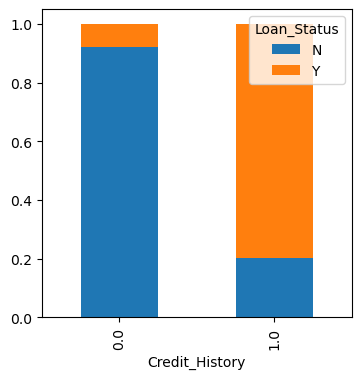

In [1155]:
Married=pd.crosstab(loan_train_drop['Married'],loan_train_drop['Loan_Status']) 
Dependents=pd.crosstab(loan_train_drop['Dependents'],loan_train_drop['Loan_Status']) 
Self_Employed=pd.crosstab(loan_train_drop['Self_Employed'],loan_train_drop['Loan_Status']) 
Credit_History=pd.crosstab(loan_train_drop['Credit_History'], loan_train_drop['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4), stacked=True) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4), stacked=True)
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4), stacked=True)

In [1156]:
loan_test=pd.read_csv('test_dataset.csv')
loan_test.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [1157]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [1158]:
loan_test.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [1159]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [1160]:
corr_test=loan_test.corr()
corr_test

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/1116917926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_test=loan_test.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.493451,0.023249,0.099553
CoapplicantIncome,-0.110335,1.000000,0.150850,-0.010984,-0.071235
LoanAmount,0.493451,0.150850,1.000000,0.094950,-0.012578
Loan_Amount_Term,0.023249,-0.010984,0.094950,1.000000,-0.053593
Credit_History,0.099553,-0.071235,-0.012578,-0.053593,1.000000


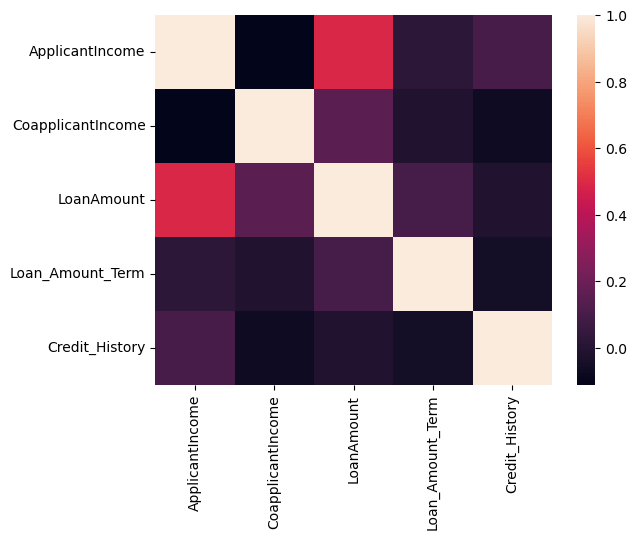

In [1161]:
ax_test= sns.heatmap(corr_test)

In [1162]:
loan_test_drop=loan_test.drop(columns=['Loan_ID','Education', 'Property_Area', 'Gender'])
loan_test_drop

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Yes,0,No,5720,0,110.0,360.0,1.0
1,Yes,1,No,3076,1500,126.0,360.0,1.0
2,Yes,2,No,5000,1800,208.0,360.0,1.0
3,Yes,2,No,2340,2546,100.0,360.0,NaN
4,No,0,No,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...
362,Yes,3+,Yes,4009,1777,113.0,360.0,1.0
363,Yes,0,No,4158,709,115.0,360.0,1.0
364,No,0,No,3250,1993,126.0,360.0,NaN
365,Yes,0,No,5000,2393,158.0,360.0,1.0


In [1163]:
loan_test.info()
loan_test.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [1164]:
loan_test_drop.dropna()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Yes,0,No,5720,0,110.0,360.0,1.0
1,Yes,1,No,3076,1500,126.0,360.0,1.0
2,Yes,2,No,5000,1800,208.0,360.0,1.0
4,No,0,No,3276,0,78.0,360.0,1.0
5,Yes,0,Yes,2165,3422,152.0,360.0,1.0
...,...,...,...,...,...,...,...,...
361,Yes,1,No,2269,2167,99.0,360.0,1.0
362,Yes,3+,Yes,4009,1777,113.0,360.0,1.0
363,Yes,0,No,4158,709,115.0,360.0,1.0
365,Yes,0,No,5000,2393,158.0,360.0,1.0


In [1165]:
loan_test_drop['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

<Axes: >

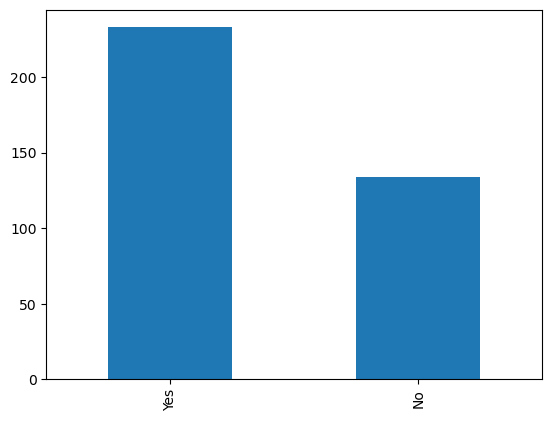

In [1166]:
loan_test_drop['Married'].value_counts().plot.bar()

In [1167]:
loan_test_drop['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

<Axes: >

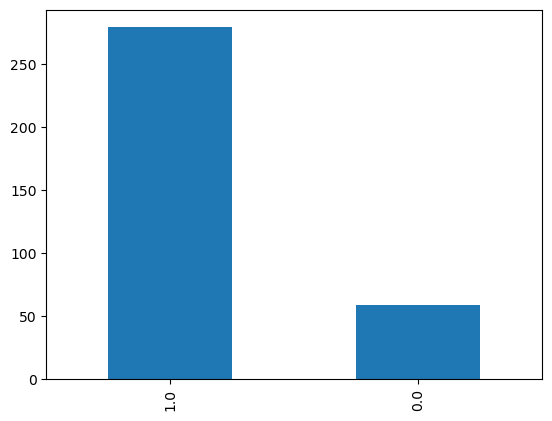

In [1168]:
loan_test_drop['Credit_History'].value_counts().plot.bar()

In [1169]:
loan_test_drop['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

<Axes: >

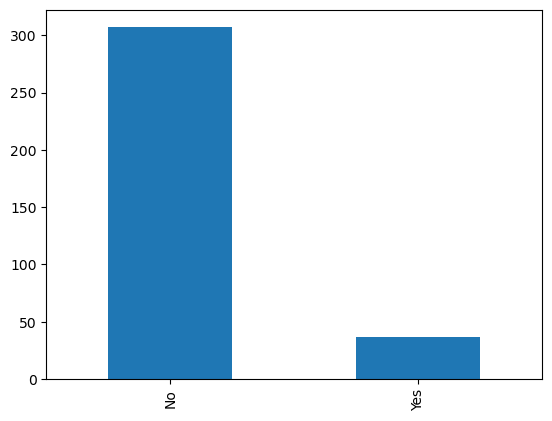

In [1170]:
loan_test_drop['Self_Employed'].value_counts().plot.bar()

<Axes: >

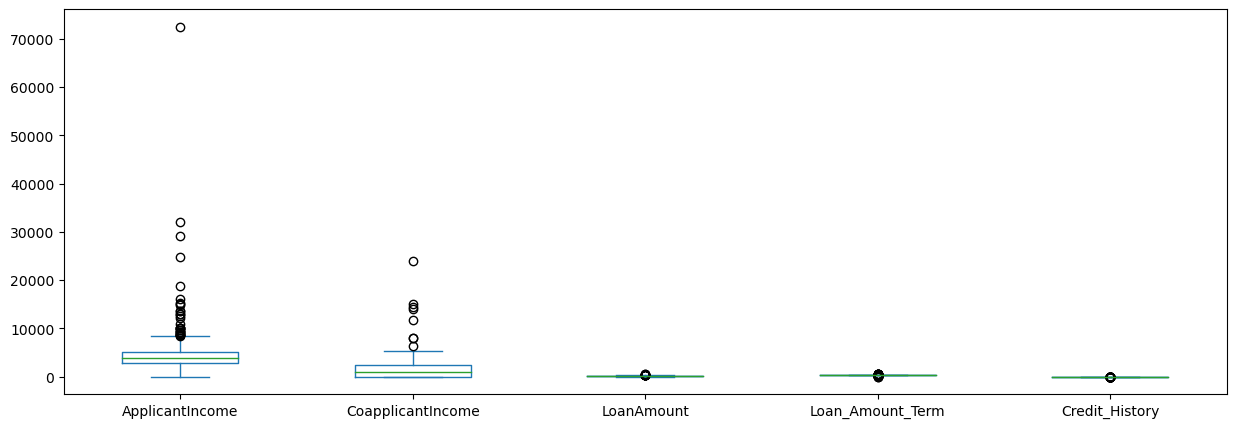

In [1171]:
loan_test_drop.plot.box(figsize=(15,5))

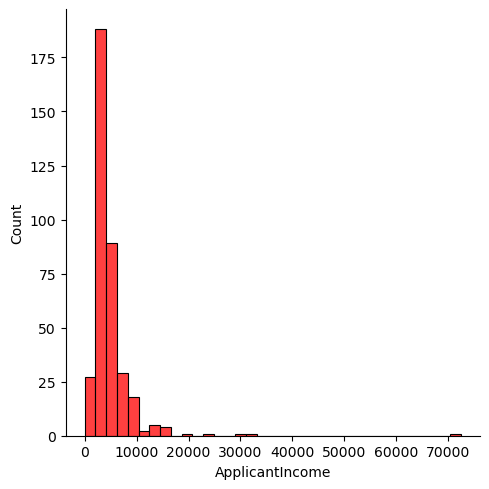

In [1172]:
sns.displot(loan_test_drop['ApplicantIncome'], kde = False, color ='red', bins = 35)

<Axes: >

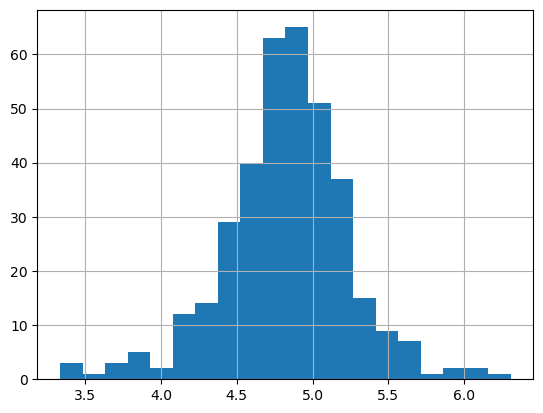

In [1173]:
loan_test_drop["LoanAmount"]= np.log (loan_test_drop["LoanAmount"])
loan_test_drop["LoanAmount"].hist(bins=20)

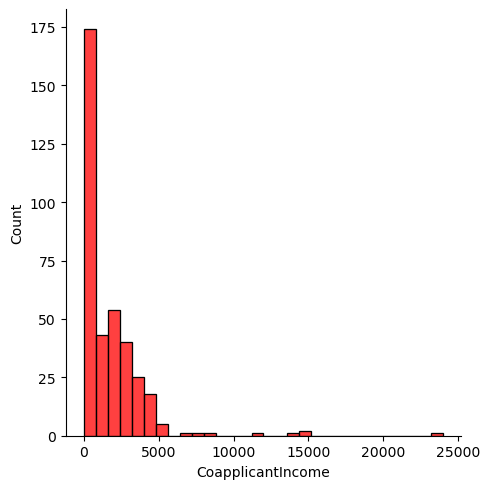

In [1174]:
sns.displot(loan_test_drop['CoapplicantIncome'], kde = False, color ='red', bins = 30)

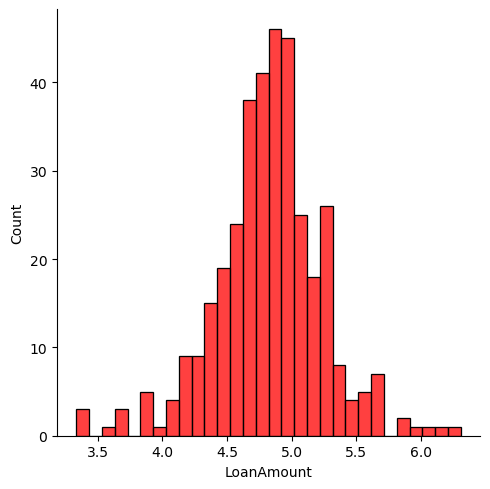

In [1175]:
sns.displot(loan_test_drop['LoanAmount'], kde = False, color ='red', bins = 30)

<Axes: title={'center': 'LoanAmount'}, xlabel='Credit_History'>

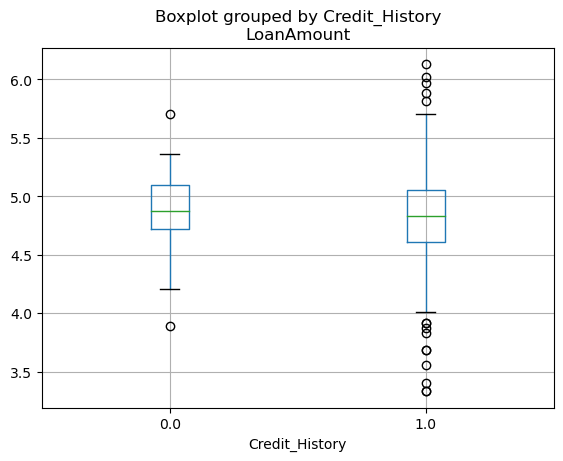

In [1176]:
loan_test_drop.boxplot(column="LoanAmount", by="Credit_History")

In [1177]:
loan_train_drop.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y
1,Yes,1,No,4583,1508.0,4.852030,360.0,1.0,N
2,Yes,0,Yes,3000,0.0,4.189655,360.0,1.0,Y
3,Yes,0,No,2583,2358.0,4.787492,360.0,1.0,Y
4,No,0,No,6000,0.0,4.948760,360.0,1.0,Y


In [1178]:
loan_train_drop.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,No,5849,0.0,NaN,360.0,1.0,Y
1,Yes,1,No,4583,1508.0,4.852030,360.0,1.0,N
2,Yes,0,Yes,3000,0.0,4.189655,360.0,1.0,Y
3,Yes,0,No,2583,2358.0,4.787492,360.0,1.0,Y
4,No,0,No,6000,0.0,4.948760,360.0,1.0,Y


In [1179]:
loan_train_drop2= loan_train_drop.dropna()

In [1180]:
loan_train_drop2["Loan_Status"].replace("N",0, inplace=True)
loan_train_drop2["Loan_Status"].replace("Y", 1, inplace=True)
y= loan_train_drop2["Loan_Status"]
X=loan_train_drop2.drop(columns=["Loan_Status"])
print(X.shape) 
print(y.shape)
y.value_counts()


(492, 8)
(492,)


/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/437764133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_train_drop2["Loan_Status"].replace("N",0, inplace=True)
/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/437764133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_train_drop2["Loan_Status"].replace("Y", 1, inplace=True)


1    339
0    153
Name: Loan_Status, dtype: int64

In [1181]:
X= pd.get_dummies(X) # it makas categorical data into a dummy set. ei jonno classifier e fela easy hoy.
test= loan_test_drop.dropna()
test= pd.get_dummies(test)
print(test.shape) 
print(test.shape)

(299, 13)
(299, 13)


In [1182]:
# we will separate the dataset. 
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [1183]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [1184]:
#calculate the loan_status for the validation set are by calculating the accuracy. 
pred_cv= model.predict(x_cv)
accuracy_score (y_cv, pred_cv)

0.8445945945945946

In [1185]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [1186]:
X.columns 

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [1187]:
pred_test= model.predict(test)

In [1188]:
pred_test.shape

(299,)

## Logistic regression using stratified k-folds cross validation.

In [1189]:
from sklearn.model_selection import StratifiedKFold 
accuracy=[]
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl1 = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl1,pred_test)
     print('accuracy_score',score)
     accuracy.append(score)
     i+=1
pred_test = model.predict(test)
pred1=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)


n1 of kfold 5
accuracy_score 0.8080808080808081
n2 of kfold 5
accuracy_score 0.8080808080808081
n3 of kfold 5
accuracy_score 0.8061224489795918
n4 of kfold 5
accuracy_score 0.8061224489795918
n5 of kfold 5
accuracy_score 0.8061224489795918
Mean accuracy is 0.8069057926200783


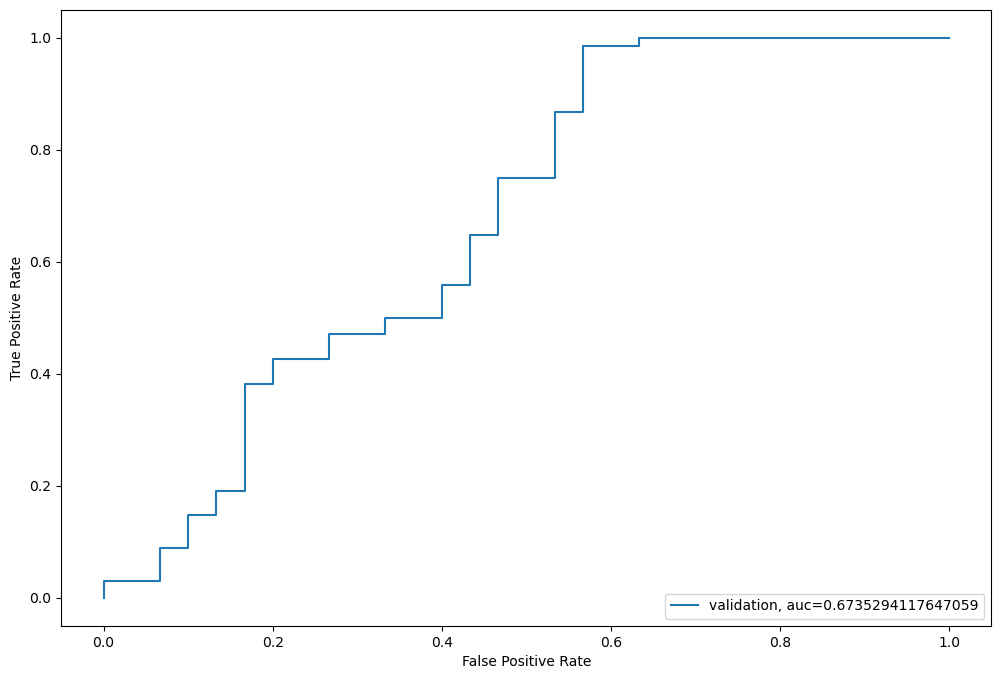

In [1190]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = roc_curve (yvl1,pred1) 
auc = metrics.roc_auc_score(yvl1, pred1) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

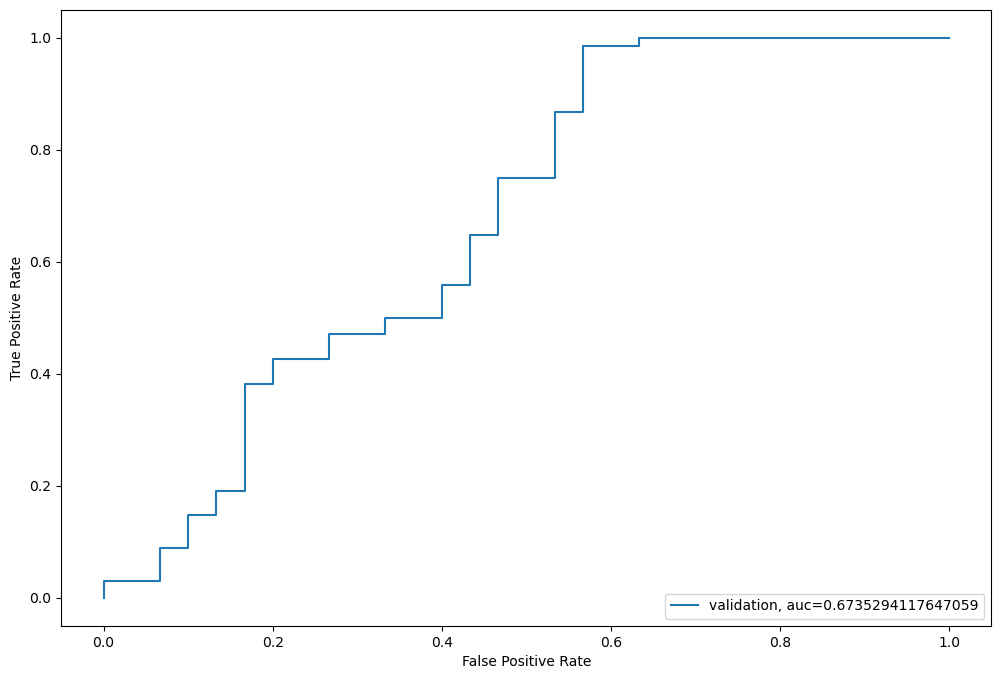

In [1191]:

from sklearn import metrics
import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl1,pred1) 
auc = metrics.roc_auc_score(yvl1, pred1) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()


Based on the knowledge, we can add three different features. </br>
- Total income: We will add Applicant income with Co-applicant income. It may increase the chance of loan approval. </br>
- EMI: We can offer EMI. We can calculate EMI by taking the ratio of loan amount with respect to loan amount term. </br>
- Balance income: This is the income after EMI has been paid. So, if the person have high balance income, the chance is high that the person can repay the loan. </br> 

### Model Building: Part 2 

In [1192]:
# preparing the dataset for fiting in the dataset. Lo
loan_train_drop=loan_train
loan_train_drop["EMI"]=loan_train_drop["LoanAmount"]/loan_train_drop["Loan_Amount_Term"]
loan_train_drop["total_Income"]= loan_train_drop["ApplicantIncome"]+loan_train_drop["CoapplicantIncome"]
loan_train_drop["Balance_Income"]= loan_train_drop["total_Income"]-(loan_train_drop["EMI"]*1000)
loan_train_drop["LoanAmount_log"]=np.log(loan_train_drop["LoanAmount"])
loan_train_drop["total_Income"]=np.log(loan_train_drop["total_Income"])
loan_train_drop=loan_train_drop.drop(columns=['Loan_ID','Education', 'Property_Area', 'Gender','ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1) 
loan_train_drop2=loan_train_drop.dropna()
loan_train_drop2["Loan_Status"].replace("N",0, inplace=True)
loan_train_drop2["Loan_Status"].replace("Y", 1, inplace=True)
y= loan_train_drop2["Loan_Status"]
X= loan_train_drop2.drop(columns=["Loan_Status"])
print(X.shape) 
print(y.shape)
# dimensions are same. so, now we will make dummy variables to the categorical data. 
X= pd.get_dummies(X)
print("after including dummy variables:", X.shape)

(492, 8)
(492,)
after including dummy variables: (492, 13)


/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/562442177.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_train_drop2["Loan_Status"].replace("N",0, inplace=True)
/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/562442177.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_train_drop2["Loan_Status"].replace("Y", 1, inplace=True)


In [1193]:
loan_test_drop= loan_test
loan_test_drop["EMI"]= loan_test_drop["LoanAmount"]/loan_test_drop["Loan_Amount_Term"]
loan_test_drop["total_Income"]= loan_test_drop["ApplicantIncome"]+loan_test_drop["CoapplicantIncome"]
loan_test_drop["Balance_Income"]= loan_test_drop["total_Income"]-(loan_test_drop["EMI"]*1000)
loan_test_drop["LoanAmount_log"]=np.log(loan_test_drop["LoanAmount"])
loan_test_drop["total_Income"]=np.log(loan_test_drop["total_Income"])
loan_test_drop=loan_test_drop.drop(columns=['Loan_ID','Education', 'Property_Area', 'Gender','ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term'], axis=1) 
loan_test_drop2=loan_test_drop.dropna()
loan_test_drop2.head()
test= loan_test_drop2.dropna()
test= pd.get_dummies(test)
print("after including dummy variables:", test.shape)

after including dummy variables: (299, 13)


In [1194]:
# we will separate the dataset. 
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

## Decision Tree model using stratified k-folds cross validation.

In [1195]:
from sklearn import tree
accuracy=[]
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl2 = y.iloc[train_index],y.iloc[test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl2,pred_test) 
    print('accuracy_score',score) 
    accuracy.append(score)
    i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)


n1 of kfold 5
accuracy_score 0.6565656565656566
n2 of kfold 5
accuracy_score 0.7171717171717171
n3 of kfold 5
accuracy_score 0.7244897959183674
n4 of kfold 5
accuracy_score 0.6632653061224489
n5 of kfold 5
accuracy_score 0.6836734693877551
Mean accuracy is 0.689033189033189


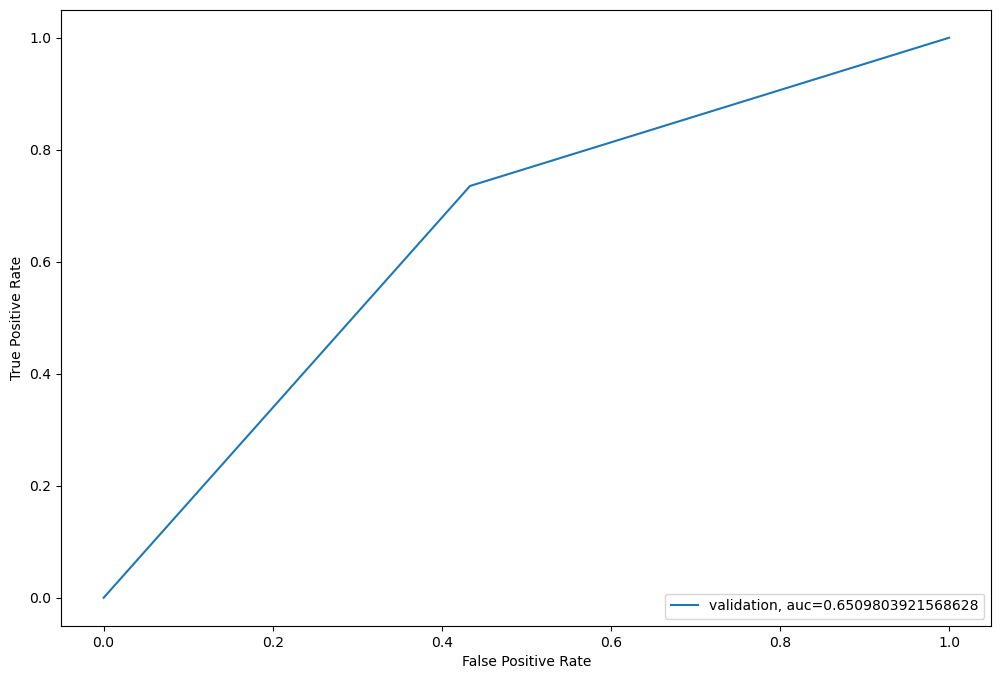

In [1196]:
from sklearn import metrics
import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl2,pred2) 
auc = metrics.roc_auc_score(yvl2, pred2) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

<Axes: >

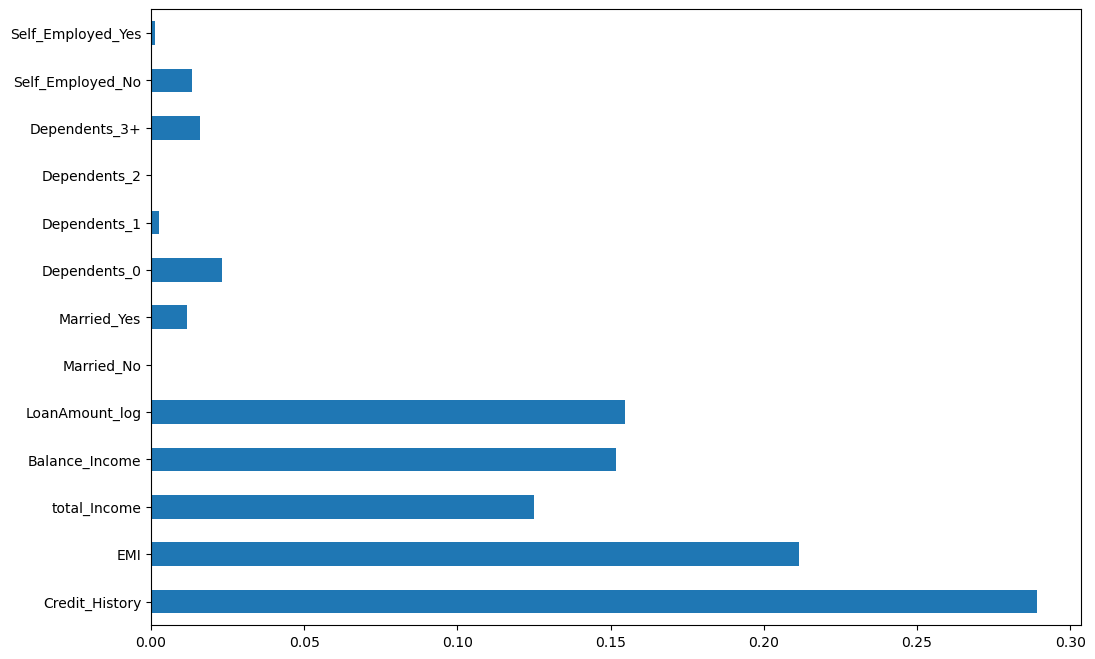

In [1197]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

 ## C5.0 Model using stratified k-folds cross validation.

In [1198]:
from sklearn.tree import DecisionTreeClassifier
accuracy=[]
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl3 = y.iloc[train_index],y.iloc[test_index] 
    model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl3,pred_test) 
    print('accuracy_score',score)
    accuracy.append(score) 
    i+=1 
pred_test = model.predict(test) 
pred3=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)


n1 of kfold 5
accuracy_score 0.797979797979798
n2 of kfold 5
accuracy_score 0.797979797979798
n3 of kfold 5
accuracy_score 0.8061224489795918
n4 of kfold 5
accuracy_score 0.7551020408163265
n5 of kfold 5
accuracy_score 0.8163265306122449
Mean accuracy is 0.7947021232735518


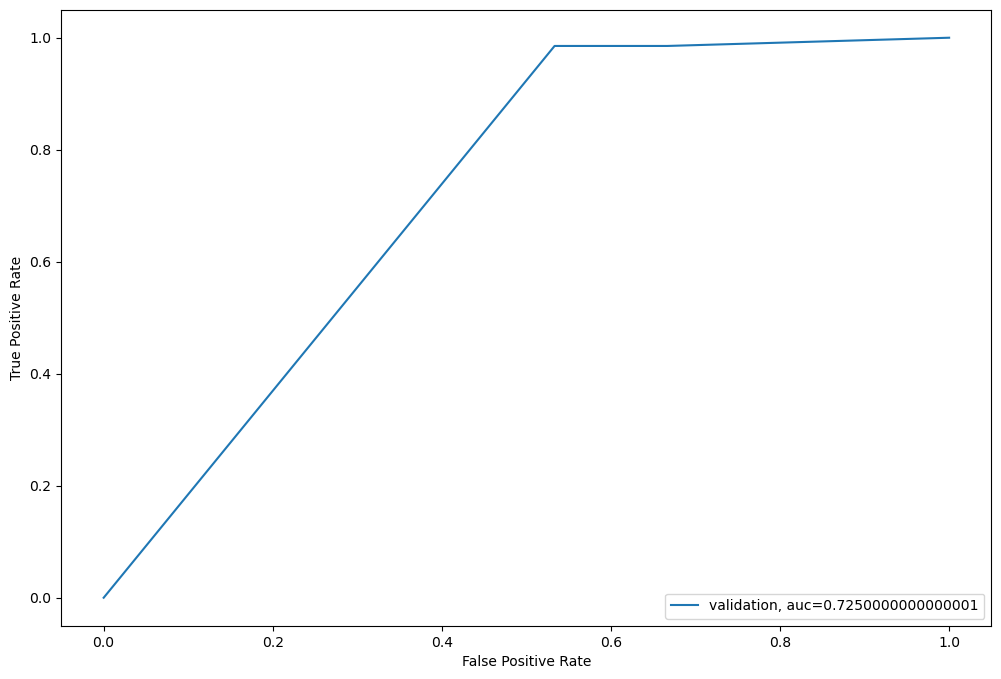

In [1199]:
from sklearn import metrics
import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl3,pred3) 
auc = metrics.roc_auc_score(yvl3, pred3) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

<Axes: >

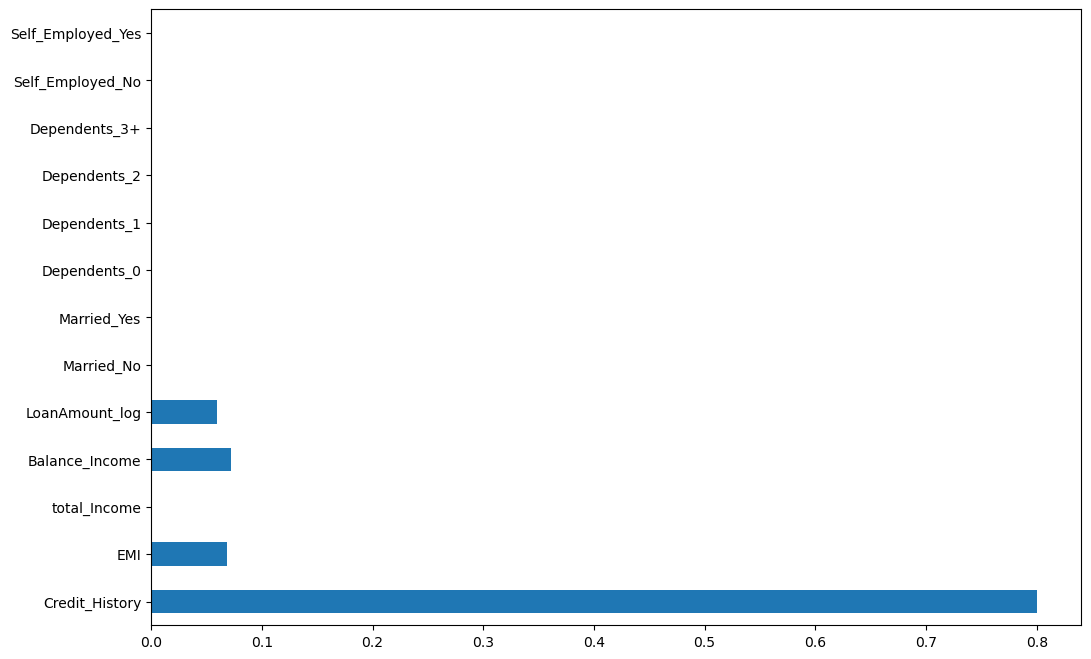

In [1200]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

## Random Forest Model using stratified k-folds cross validation.

In [1201]:
from sklearn.ensemble import RandomForestClassifier
accuracy=[]
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl4 = y.iloc[train_index],y.iloc[test_index] 
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl4,pred_test) 
    print('accuracy_score',score) 
    accuracy.append(score)
    i+=1 
pred_test = model.predict(test)
pred4=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)


n1 of kfold 5
accuracy_score 0.7878787878787878
n2 of kfold 5
accuracy_score 0.8080808080808081
n3 of kfold 5
accuracy_score 0.8061224489795918
n4 of kfold 5
accuracy_score 0.7959183673469388
n5 of kfold 5
accuracy_score 0.8163265306122449
Mean accuracy is 0.8028653885796743


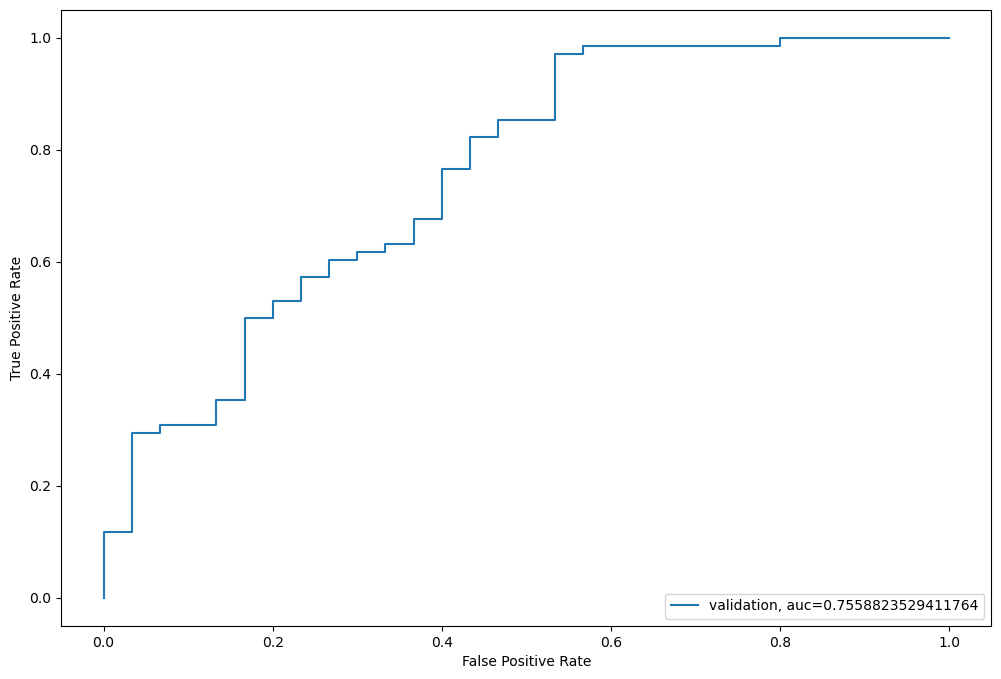

In [1202]:
from sklearn import metrics
import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl4,pred4) 
auc = metrics.roc_auc_score(yvl4, pred4) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

<Axes: >

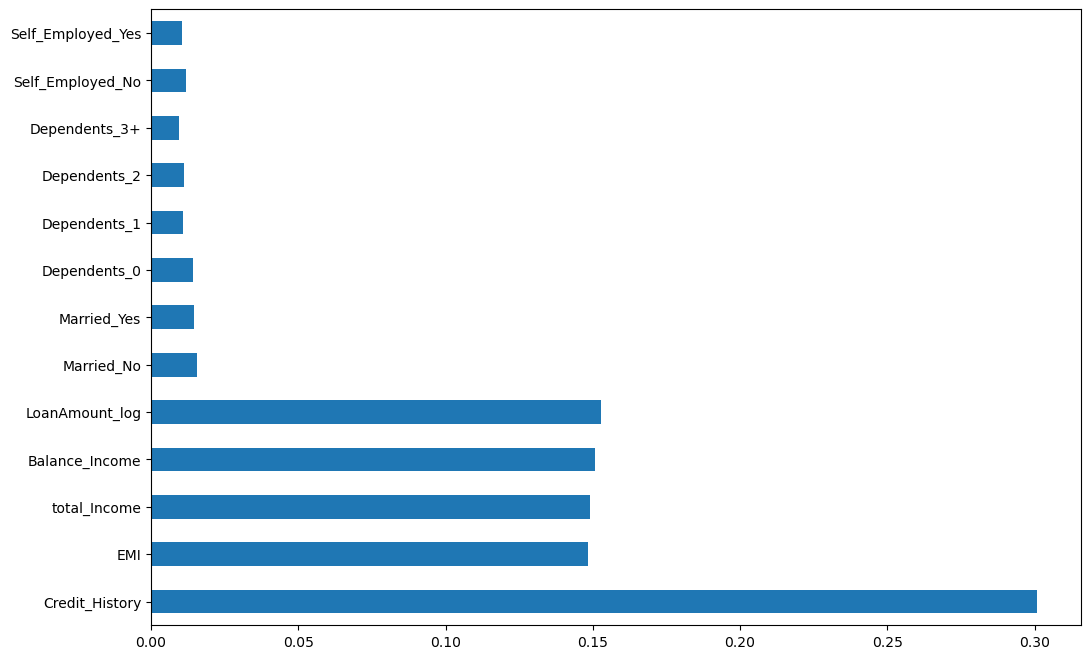

In [1203]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

## XGBOOST Model using stratified k-folds cross validation.


In [1204]:
from xgboost import XGBClassifier
accuracy=[]
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl5 = y.iloc[train_index],y.iloc[test_index] 
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl5,pred_test) 
    print('accuracy_score',score) 
    accuracy.append(score)
    i+=1 
pred_test = model.predict(test)
pred5=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)

n1 of kfold 5
accuracy_score 0.7474747474747475
n2 of kfold 5
accuracy_score 0.7575757575757576
n3 of kfold 5
accuracy_score 0.7857142857142857
n4 of kfold 5
accuracy_score 0.7857142857142857
n5 of kfold 5
accuracy_score 0.7959183673469388
Mean accuracy is 0.774479488765203


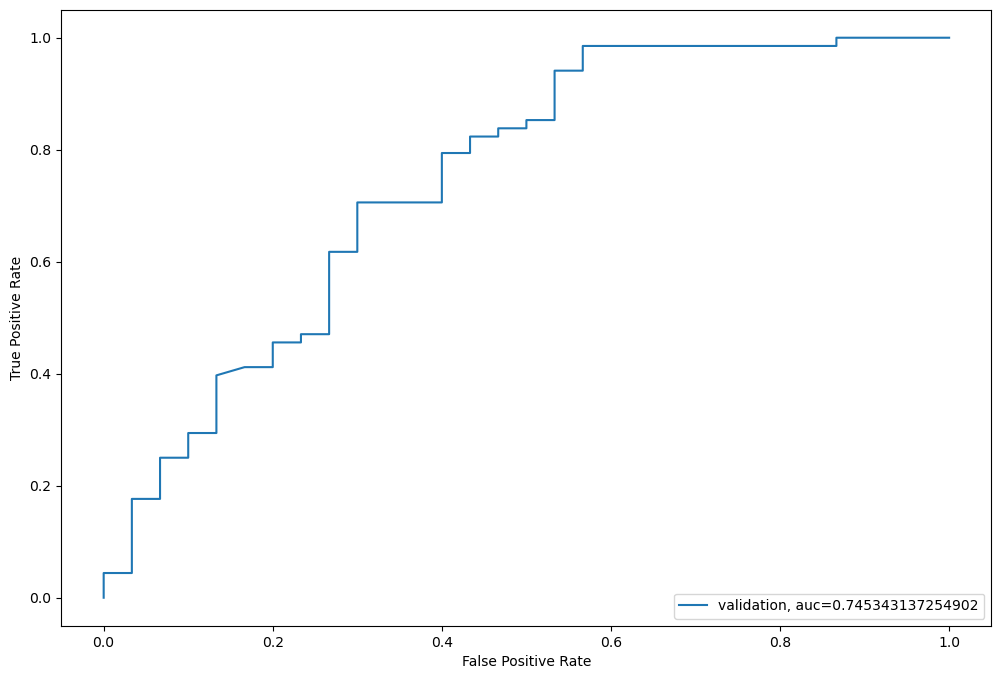

In [1205]:
from sklearn import metrics
import matplotlib.pyplot as plt 

#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl5,pred5) 
auc = metrics.roc_auc_score(yvl5, pred5) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()


<Axes: >

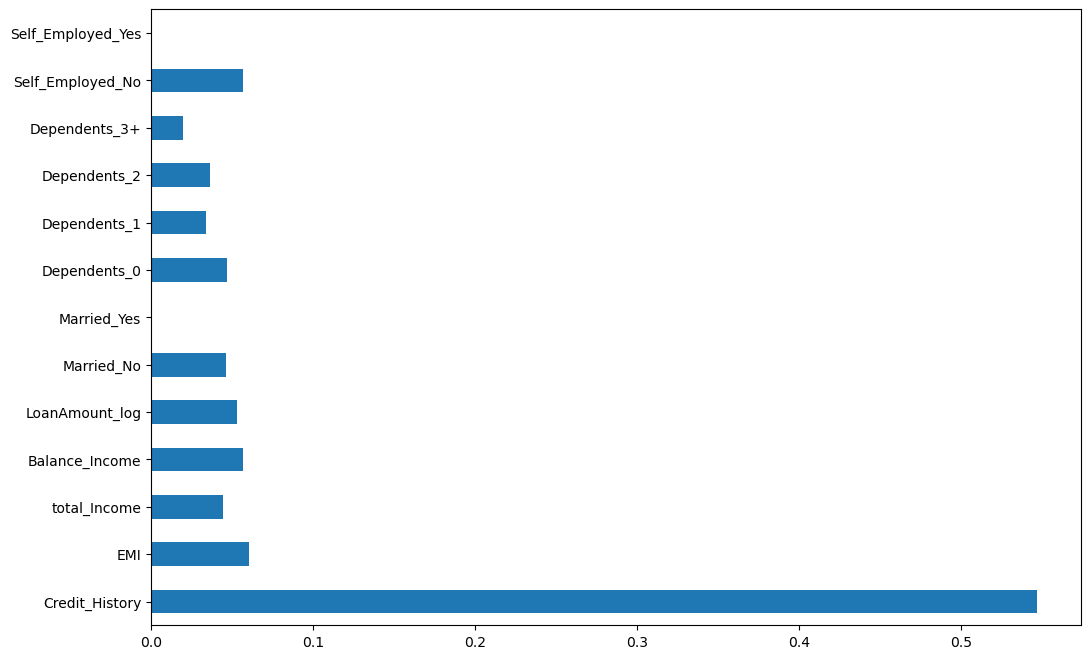

In [1206]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

## Naive Bayes using stratified k-folds cross validation

In [1207]:
from sklearn.naive_bayes import GaussianNB
accuracy=[]
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl6 = y.iloc[train_index],y.iloc[test_index] 
    model = GaussianNB()
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl6,pred_test) 
    print('accuracy_score',score) 
    accuracy.append(score)
    i+=1 
pred_test = model.predict(test)
pred6=model.predict_proba(xvl)[:,1]
mean_accuracy= statistics.mean(accuracy)
print('Mean accuracy is',mean_accuracy)

n1 of kfold 5
accuracy_score 0.8282828282828283
n2 of kfold 5
accuracy_score 0.7676767676767676
n3 of kfold 5
accuracy_score 0.8061224489795918
n4 of kfold 5
accuracy_score 0.7755102040816326
n5 of kfold 5
accuracy_score 0.7959183673469388
Mean accuracy is 0.7947021232735518


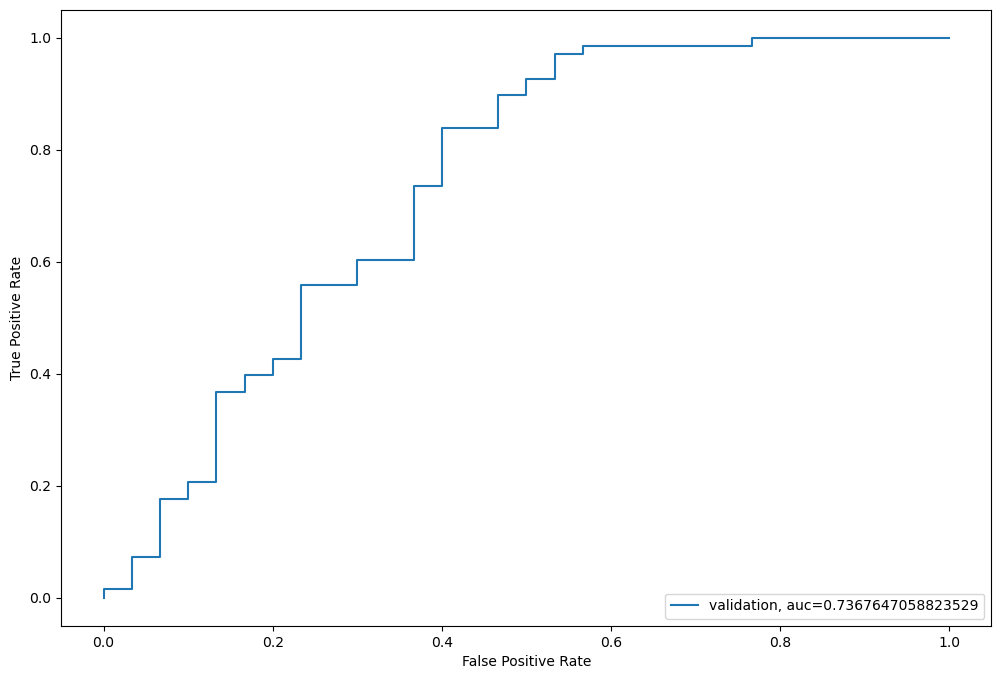

In [1208]:
#fpr= false positive rate. tpr= true positive rate. 
fpr, tpr, _ = metrics.roc_curve (yvl6,pred6) 
auc = metrics.roc_auc_score(yvl6, pred6) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [1209]:
from sklearn import tree

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
accuracy=[]
for train_index,test_index in kf.split(X,y): 
    print('n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.iloc[train_index],X.iloc[test_index] 
    ytr,yvl = y.iloc[train_index],y.iloc[test_index] 
    model = tree.DecisionTreeClassifier(random_state=1) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    print('accuracy_score',score) 
    accuracy.append(score)
    i+=1 
pred_test = model.predict(test) 
mean_accuracy= statistics.mean(accuracy)
print(mean_accuracy)

n1 of kfold 5
accuracy_score 0.6565656565656566
n2 of kfold 5
accuracy_score 0.7171717171717171
n3 of kfold 5
accuracy_score 0.7244897959183674
n4 of kfold 5
accuracy_score 0.6632653061224489
n5 of kfold 5
accuracy_score 0.6836734693877551
0.689033189033189


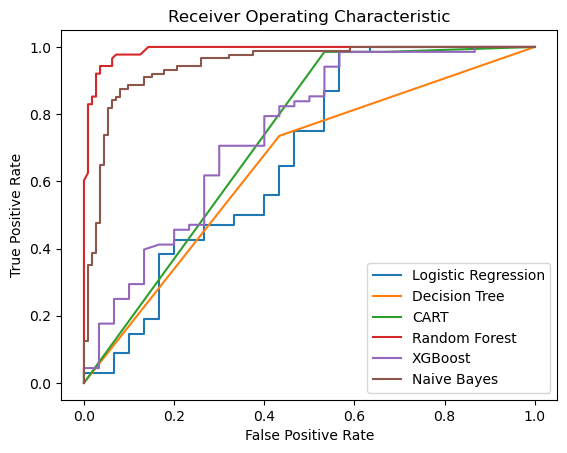

In [1210]:

from sklearn.metrics import roc_curve, auc

fpr_LRG, tpr_LRG, _ = roc_curve (yvl1,pred1) 
fpr_dtc, tpr_dtc, _ = roc_curve (yvl2,pred2)
fpr_C5, tpr_C5, _ = roc_curve (yvl3,pred3)
fpr_rfc, tpr_rfc, _ = roc_curve (yvl4,pred4) 
fpr_XBR, tpr_XBR, _ = roc_curve (yvl5,pred5)
fpr_gnb, tpr_gnb, _ = roc_curve (yvl6,pred6)


fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:, 1])
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])

# Plot the ROC curves for all models
plt.plot(fpr_LRG, tpr_LRG, label='Logistic Regression')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_C5, tpr_C5, label='CART')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_XBR, tpr_XBR, label='XGBoost')
plt.plot(fpr_gnb, tpr_gnb, label='Naive Bayes')

# Set the title, labels, and legend for the plot
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Show the plot
plt.show()


/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/2181610931.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

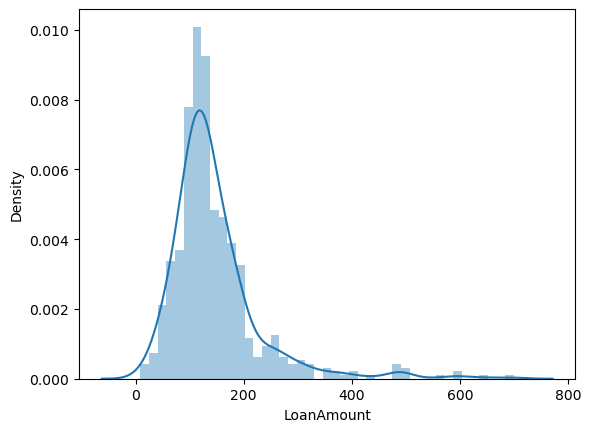

In [1211]:
loan_train=pd.read_csv('train_dataset.csv')
sns.distplot(loan_train['LoanAmount'])

/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/2018162469.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

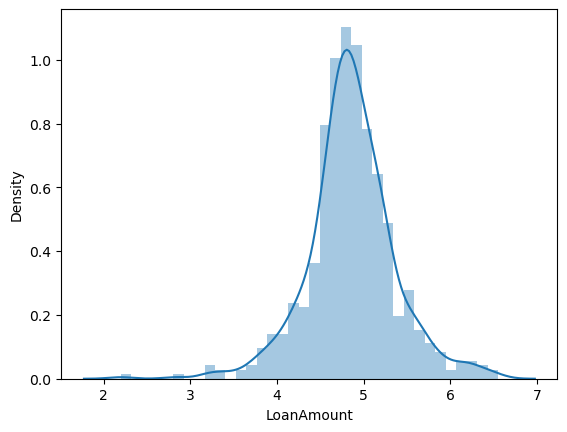

In [1212]:
loan_train ["LoanAmount"]= np.log(loan_train["LoanAmount"])
sns.distplot(loan_train['LoanAmount'])


/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/2468848738.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train_drop["total_Income"])


<Axes: xlabel='total_Income', ylabel='Density'>

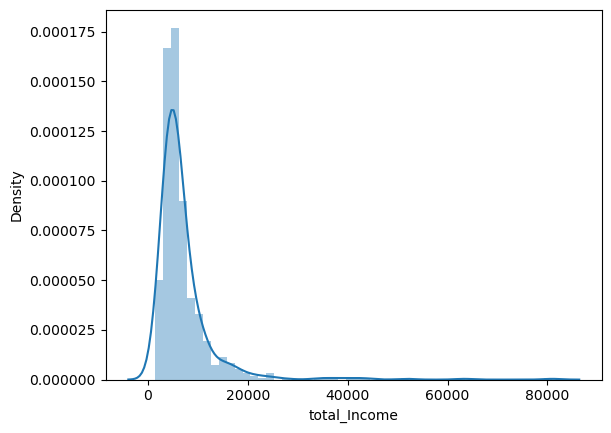

In [1213]:
import numpy as np
loan_train_drop=loan_train
loan_train_drop["total_Income"]= loan_train_drop["ApplicantIncome"]+loan_train_drop["CoapplicantIncome"]
sns.distplot(loan_train_drop["total_Income"])


/var/folders/qc/8812nyc533x05df3fh9jggnm0000gn/T/ipykernel_46995/1873596479.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_train_drop["total_Income"])


<Axes: xlabel='total_Income', ylabel='Density'>

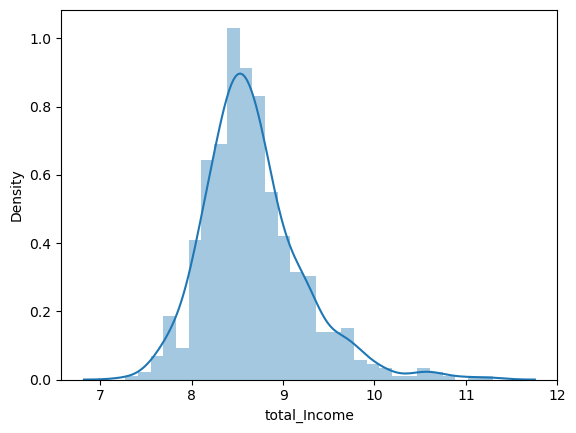

In [1214]:
loan_train_drop["total_Income"]=np.log(loan_train_drop["total_Income"])

sns.distplot(loan_train_drop["total_Income"])

